# Binary classification of cat and dog

In [11]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
import keras

In [12]:
extract_dir1=r"C:\Users\Admin\Desktop\College\nndl-programs\archive1\training_set\training_set"
extract_dir2=r"C:\Users\Admin\Desktop\College\nndl-programs\archive1\test_set\test_set"

In [13]:
train_data=keras.utils.image_dataset_from_directory(
    directory=extract_dir1,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_data=keras.utils.image_dataset_from_directory(
    directory=extract_dir2,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 8038 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [14]:
def process(image,label):
    image=tf.cast(image/255,tf.float32)
    return image,label

train_data=train_data.map(process)
validation_data=validation_data.map(process)

In [15]:
model=Sequential([
    Conv2D(32,(3,3),padding='valid',input_shape=(256,256,3),activation='relu'),
    MaxPooling2D((2,2),strides=2,padding='valid'),
    Conv2D(64,(3,3),padding='valid',activation='relu'),
    MaxPooling2D((2,2),strides=2,padding='valid'),
    Conv2D(96,(3,3),padding='valid',input_shape=(256,256,3),activation='relu'),
    MaxPooling2D((2,2),strides=2,padding='valid'),
    Conv2D(128,(3,3),padding='valid',activation='relu'),
    MaxPooling2D((2,2),strides=2,padding='valid'),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 96)        55392     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 96)       0

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history=model.fit(x=train_data,validation_data=validation_data,epochs=10)

Epoch 1/10
252/252 [==============================] - 38s 131ms/step - loss: 0.6889 - accuracy: 0.5424 - val_loss: 0.6730 - val_accuracy: 0.5855
Epoch 2/10
252/252 [==============================] - 31s 123ms/step - loss: 0.6610 - accuracy: 0.6018 - val_loss: 0.6274 - val_accuracy: 0.6445
Epoch 3/10
252/252 [==============================] - 31s 122ms/step - loss: 0.5709 - accuracy: 0.7000 - val_loss: 0.5334 - val_accuracy: 0.7260
Epoch 4/10
252/252 [==============================] - 31s 123ms/step - loss: 0.4873 - accuracy: 0.7679 - val_loss: 0.5009 - val_accuracy: 0.7545
Epoch 5/10
252/252 [==============================] - 31s 123ms/step - loss: 0.4123 - accuracy: 0.8031 - val_loss: 0.5258 - val_accuracy: 0.7680
Epoch 6/10
252/252 [==============================] - 31s 123ms/step - loss: 0.3154 - accuracy: 0.8604 - val_loss: 0.6123 - val_accuracy: 0.7485
Epoch 7/10
252/252 [==============================] - 31s 123ms/step - loss: 0.2243 - accuracy: 0.9092 - val_loss: 0.7781 - val_ac

In [18]:
model.save('cat-dog-p9.h5')

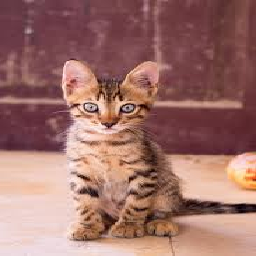

In [48]:
import numpy as np
from keras.preprocessing.image import load_img,img_to_array
test_image=load_img(r"C:\Users\Admin\Downloads\images (2).jpeg",target_size=(256,256))
test_image

In [49]:
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)

1/1 [==============================] - 0s 29ms/step


In [50]:
result

array([[0.]], dtype=float32)

In [51]:
result[0][0]

0.0

In [52]:
if result[0][0]>0.5:
    print("Dog")
else:
    print("Cat")

Cat
